In [23]:
# !pip install seaborn
# !pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 14.1 MB/s eta 0:00:00


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
data_folder = '../data/processed/'
train_df = pd.read_csv(data_folder+'train_data_processed.csv')
train_df

,id,title,genre,description,year,processed_description,processed_description_string,language
0,1,Oscar et la dame rose,drama,Listening in to a conversation between his do...,2009,"['listen', 'convers', 'doctor', 'parent', '10-...",listen convers doctor parent 10-year-old oscar...,English
1,2,Cupid,thriller,A brother and sister with a past incestuous r...,1997,"['brother', 'sister', 'past', 'incestu', 'rela...",brother sister past incestu relationship curre...,English
2,3,"Young, Wild and Wonderful",adult,As the bus empties the students for their fie...,1980,"['bu', 'empti', 'student', 'field', 'trip', 'm...",bu empti student field trip museum natur histo...,English
3,4,The Secret Sin,drama,To help their unemployed father make ends mee...,1915,"['help', 'unemploy', 'father', 'make', 'end', ...",help unemploy father make end meet edith twin ...,English
4,5,The Unrecovered,drama,The film's title refers not only to the un-re...,2007,"['film', 'titl', 'refer', 'un-recov', 'bodi', ...",film titl refer un-recov bodi ground zero also...,English
...,...,...,...,...,...,...,...,...
54209,54210,"""Bonino""",comedy,This short-lived NBC live sitcom centered on ...,1953,"['short-liv', 'nbc', 'live', 'sitcom', 'center...",short-liv nbc live sitcom center bonino world-...,English
54210,54211,Dead Girls Don't Cry,horror,The NEXT Generation of EXPLOITATION. The sist...,????,"['next', 'gener', 'exploit', 'sister', 'kapa',...",next gener exploit sister kapa - bay soror hou...,English
54211,54212,Ronald Goedemondt: Ze bestaan echt,documentary,"Ze bestaan echt, is a stand-up comedy about g...",2008,"['ze', 'bestaan', 'echt', 'stand-up', 'comedi'...",ze bestaan echt stand-up comedi grow face fear...,English
54212,54213,Make Your Own Bed,comedy,Walter and Vivian live in the country and hav...,1944,"['walter', 'vivian', 'live', 'countri', 'diffi...",walter vivian live countri difficult time keep...,English


In [27]:
train_df = train_df[train_df['language']=='English']

<AxesSubplot:xlabel='count', ylabel='genre'>

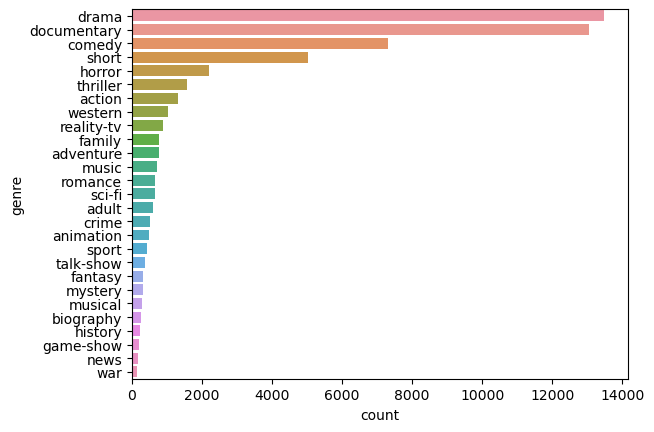

In [28]:
sns.countplot(data=train_df, y='genre',order=train_df['genre'].value_counts().index)

### Dealing Data Imbalance with Oversampling

In [29]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
X, y = train_df['processed_description_string'],train_df['genre']

<AxesSubplot:xlabel='count', ylabel='genre'>

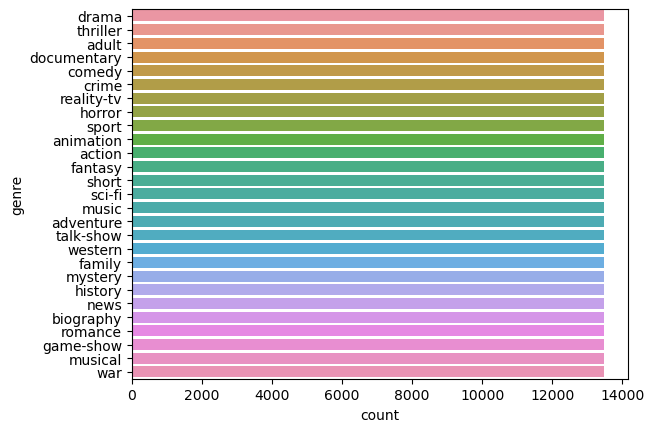

In [46]:
oversample = RandomOverSampler(sampling_strategy='not majority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X.values.reshape(-1,1), y)
# summarize class distribution
sns.countplot(y=y_over)

In [56]:
oversampled_df = pd.DataFrame({'description':X_over.reshape(-1),'genre':y_over})
oversampled_df.head()

,description,genre
0,listen convers doctor parent 10-year-old oscar...,drama
1,brother sister past incestu relationship curre...,thriller
2,bu empti student field trip museum natur histo...,adult
3,help unemploy father make end meet edith twin ...,drama
4,film titl refer un-recov bodi ground zero also...,drama


In [58]:
oversampled_df.to_csv(data_folder+'RandomOverSampled.csv')

### TFIDF and LogReg

In [91]:
## TFIDF Vectorizer & Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
##model
model = LogisticRegression()

##transform text
text_transformer = TfidfVectorizer(max_features=150000)
transformed_text = text_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    transformed_text, y, test_size=0.2, random_state=42)

# cross_val_score(model, transformed_text,y,cv=5)
model.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_score(y_test,preds)

/home/kah3465/anaconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5779697222996192

In [82]:
transformed_text.shape

(364122, 92012)

In [83]:
##transform oversampled text

text_transformer = TfidfVectorizer(max_features=150000,lowercase=False)
transformed_text = text_transformer.fit_transform(X_over.reshape(-1))
X_train, X_test_discard, y_train, y_test_discard = train_test_split(
    transformed_text, y_over, test_size=0.2, random_state=42)
# cross_val_score(model, transformed_text,y_over,cv=5)
model.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_score(y_test,preds)

/home/kah3465/anaconda3/envs/jupyter/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7535989597845268

### Using SMOTE

In [94]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
## pass in number of dimensions to reduce to this function to perform dimension reduction
def do_smote(X,y,dim_red = None):
    if dim_red != None:
        pca = PCA(n_components = dim_red)
        X = pca.fit_transform(X.toarray())
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X, y)
    return X_smote,y_smote
    

In [93]:
type(transformed_text)

scipy.sparse._csr.csr_matrix

In [ ]:
##transform text
text_transformer = TfidfVectorizer(max_features=150000)
transformed_text = text_transformer.fit_transform(X)
X_smote,y_smote = do_smote(transformed_text,y,300)
X_train, X_test_discard, y_train, y_test_discard = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42)
# cross_val_score(model, transformed_text,y_over,cv=5)
model.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy_score(y_test,preds)